In [97]:
!pip install pandas
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 7.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.7 MB 5.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.7 MB 4.7 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.7 MB 4.4 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.7 MB 4.2 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.8/8.7 MB 4.2 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 4.1 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.7 MB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.7 MB 4.0 MB/s eta 0:00:01
   ------------

<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
C:\Users\rithy\AppData\Local\Temp\ipykernel_20160\408190014.py:4: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv('C:\housing.csv')


median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


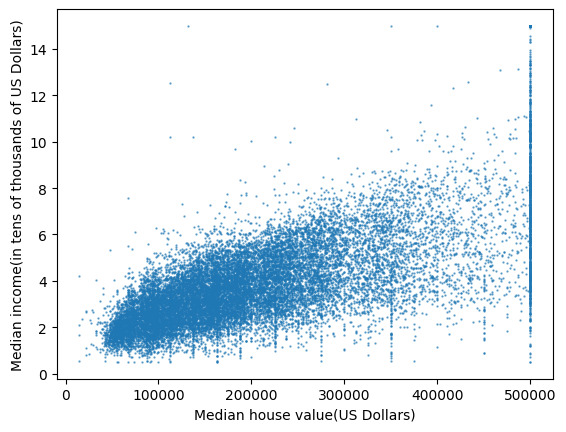

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('C:\housing.csv')
X = data.iloc[:,8]
Y = data.iloc[:,7]
top_features = ['median_income', 'ocean_proximity_<1H OCEAN', 
               'ocean_proximity_INLAND']
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'])
correlations = data_encoded.corr()['median_house_value'].sort_values(ascending=False)
print(correlations)
plt.scatter(X, Y,alpha=0.6,s=.5)
plt.xlabel('Median house value(US Dollars)')
plt.ylabel('Median income(in tens of thousands of US Dollars)')
plt.show()

In [62]:
# Fill missing values with 0 instead
X_multi = data_encoded[top_features].fillna(0).values.astype(float)
Y = data_encoded['median_house_value'].fillna(0).values.astype(float)
#Normalization
X_mean = np.mean(X_multi, axis=0)
X_std = np.std(X_multi, axis=0)  
X_multi_norm = (X_multi - X_mean) / X_std
Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y_norm = (Y - Y_mean) / Y_std


Weights= [ 0.60979725 -0.08022757 -0.38727513] Bias= -1.1677136432646612e-16


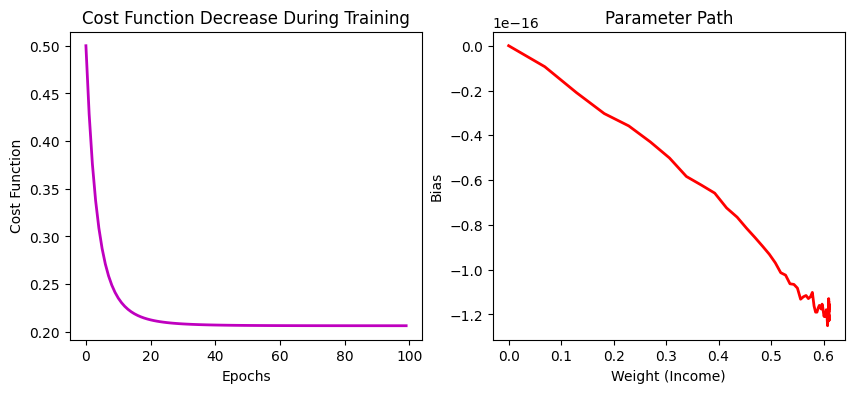

In [83]:
# Building the model

n_samples, n_features = X_multi_norm.shape
weights = np.zeros(n_features)  # One weight per feature
bias = 0
L = 0.05  # The learning Rate
epochs = 100 # The number of iterations to perform gradient descent
J=[]
# Store parameter history during training
weight1_history = []
bias_history = []

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred_multi = np.sum(X_multi_norm * weights, axis=1) + bias  # The current predicted value of Y
    costf = np.sum((Y_norm - Y_pred_multi)**2) / (2*n_samples) 
    J.append(costf)  # for viewing how cost function decreases with epochs
    error = Y_norm - Y_pred_multi  
    dw = np.zeros(n_features)

     # Track parameters
    weight1_history.append(weights[0])
    bias_history.append(bias)
    
    # Calculate gradient for each weight
    for j in range(n_features):
        dw[j] = -(2/n_samples) * np.sum(X_multi_norm[:, j] * error)
    db = -(2/n_samples) * np.sum(error)
    # Update weights and bias
    weights = weights - L * dw
    bias = bias - L * db

# Print final parameters    
print ('Weights=',weights,'Bias=',bias) 

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(J,'m' , linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Cost Function')
plt.title('Cost Function Decrease During Training')

plt.subplot(1, 2, 2)
plt.plot(weight1_history, bias_history, 'r-', linewidth=2)
plt.xlabel('Weight (Income)')
plt.ylabel('Bias')
plt.title('Parameter Path')
plt.show()

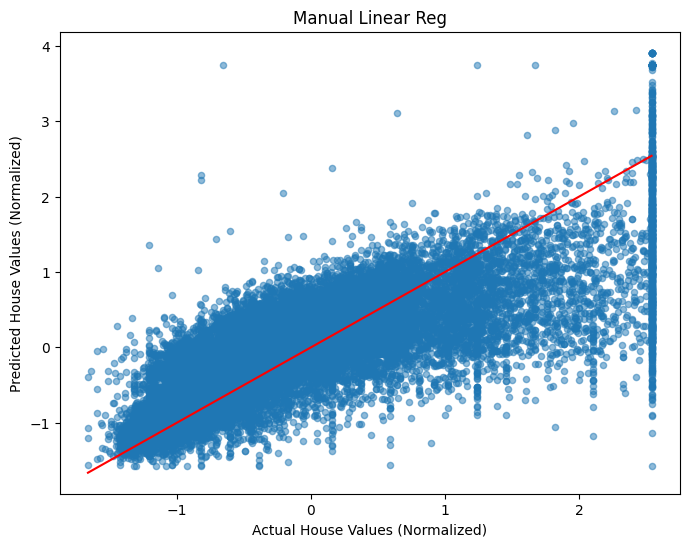

In [78]:
# Making predictions and plotting graph
Y_pred_final =np.sum(X_multi_norm * weights, axis=1) + bias
plt.figure(figsize=(8, 6))
plt.scatter(Y_norm, Y_pred_final, alpha=0.5, s=20, label='Predictions')
plt.plot([Y_norm.min(), Y_norm.max()], [Y_norm.min(), Y_norm.max()],'r')
plt.xlabel('Actual House Values (Normalized)')
plt.ylabel('Predicted House Values (Normalized)')
plt.title('Manual Linear Reg')

plt.show()



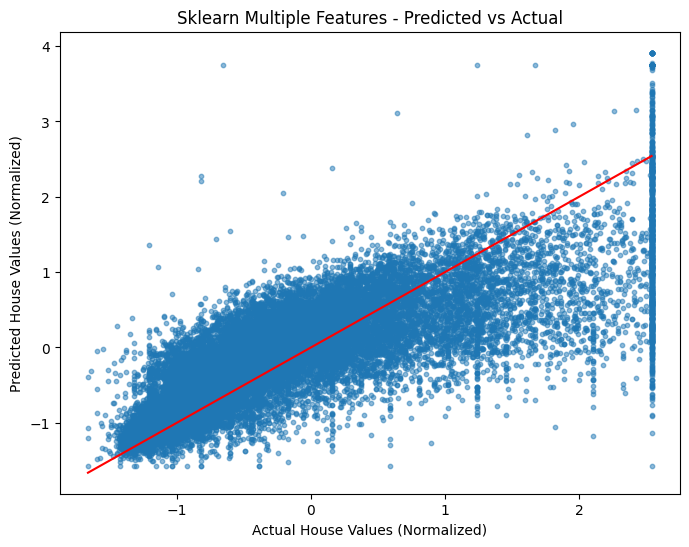

In [74]:
from sklearn.linear_model import LinearRegression
#reg model
reg=LinearRegression()
#Fitting the data
reg.fit(X_multi_norm, Y_norm)
#Predicting the data
Y_pred_sklearn = reg.predict(X_multi_norm)


# plotting the graph
plt.figure(figsize=(8, 6))
plt.scatter(Y_norm, Y_pred_sklearn, alpha=0.5, s=10)
plt.plot([Y_norm.min(), Y_norm.max()], [Y_norm.min(), Y_norm.max()],'r')
plt.xlabel('Actual House Values (Normalized)')
plt.ylabel('Predicted House Values (Normalized)')
plt.title('Sklearn Multiple Features - Predicted vs Actual')
plt.show()

In [75]:
#Performance Metric : MSE
from sklearn.metrics import mean_squared_error
mse_custom = mean_squared_error(Y_norm, Y_pred_final)
mse_sklearn= mean_squared_error(Y_norm, Y_pred_sklearn)
print(mse_custom,mse_sklearn)

0.41261527506048656 0.41260375481122014


In [76]:
#Performance Metric : R squared
from sklearn.metrics import r2_score
r2_custom = r2_score(Y_norm, Y_pred_final)
r2_sklearn = r2_score(Y_norm, Y_pred_sklearn)
print(r2_custom,r2_sklearn)

0.5873847249395134 0.5873962451887799


In [80]:
##Performance Metric : MAE
from sklearn.metrics import mean_absolute_error
mae_custom= mean_absolute_error(Y_norm, Y_pred_final)
mae_sklearn = mean_absolute_error(Y_norm, Y_pred_sklearn)
print(mae_custom,mae_sklearn)

0.46570773619478556 0.4656073004751054


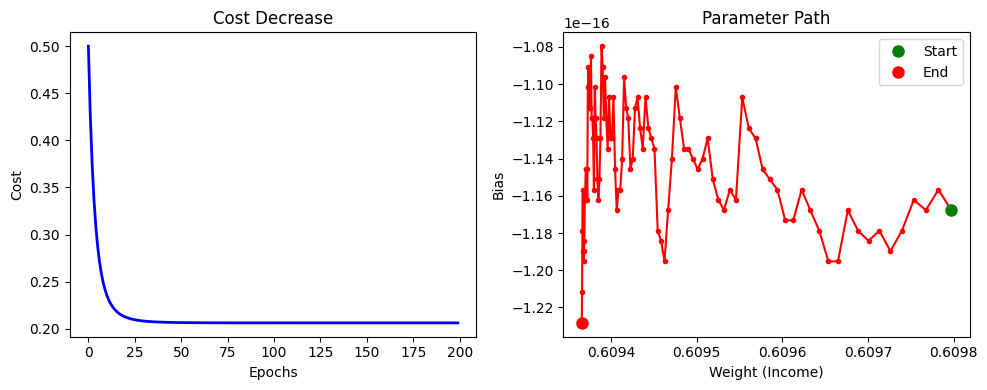

In [81]:
# Store parameter history during training
weight1_history = []
bias_history = []

# Modified gradient descent (add these 2 lines inside your loop)
for i in range(epochs): 
    # Your existing gradient descent code...
    Y_pred_multi = np.sum(X_multi_norm * weights, axis=1) + bias
    costf = np.sum((Y_norm - Y_pred_multi)**2) / (2*n_samples)
    J.append(costf)
    
    # ADD THESE TWO LINES:
    weight1_history.append(weights[0])  # Track first weight (income)
    bias_history.append(bias)           # Track bias
    
    # Rest of your gradient descent code...
    error = Y_norm - Y_pred_multi
    dw = np.zeros(n_features)
    for j in range(n_features):
        dw[j] = -(2/n_samples) * np.sum(X_multi_norm[:, j] * error)
    db = -(2/n_samples) * np.sum(error)
    weights = weights - L * dw
    bias = bias - L * db

# Simple path visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(J, 'b-', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Decrease')

plt.subplot(1, 2, 2)
plt.plot(weight1_history, bias_history, 'ro-', markersize=3)
plt.plot(weight1_history[0], bias_history[0], 'go', markersize=8, label='Start')
plt.plot(weight1_history[-1], bias_history[-1], 'ro', markersize=8, label='End')
plt.xlabel('Weight (Income)')
plt.ylabel('Bias')
plt.title('Parameter Path')
plt.legend()

plt.tight_layout()
plt.show()